In [1]:
# ! curl https://raw.githubusercontent.com/thisismetis/nyc16_ds6/master/challenges/challenges_data/2013_movies.csv?token=AFKKpIjtBxgOt809imk68g0lPrH6nAyjks5WqnDkwA%3D%3D > 2013_movies.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7774  100  7774    0     0   8395      0 --:--:-- --:--:-- --:--:--  8395


#####Challenge 1: Plot domestic total gross over time.

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [5]:
import pandas as pd

In [19]:
import datetime

In [7]:
df = pd.read_csv('2013_movies.csv')

In [8]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [25]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [26]:
type(df['ReleaseDate'][0])

pandas.tslib.Timestamp

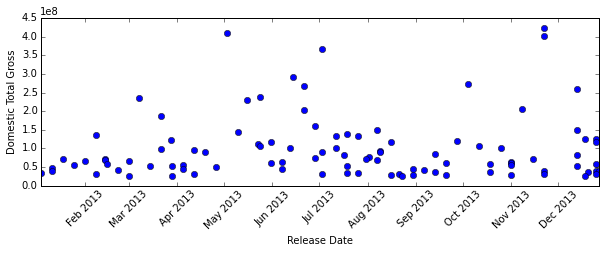

In [32]:
plt.figure(figsize=(10,3))
plt.plot_date(df['ReleaseDate'],df['DomesticTotalGross'])
plt.xticks(rotation=45)
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')

##### Challenge 2: Plot runtime vs. domestic total gross.

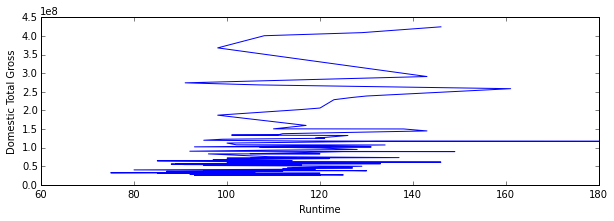

In [30]:
plt.figure(figsize=(10,3))
plt.plot(df['Runtime'],df['DomesticTotalGross'])
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')

question for later: how to change y axis to e6 instead of e8, display "Domestic Total Gross (in Millions of $)"

##### Challenge 3 
Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [33]:
df2 = df.groupby('Rating').mean()

In [34]:
df2.head()

,Budget,DomesticTotalGross,Runtime
Rating,,,
G,NaN,2.684928e+08,107.000000
PG,93933333.333333,1.311357e+08,99.933333
PG-13,96609756.097561,1.114498e+08,117.510638
R,38863636.363636,6.989243e+07,110.729730


In [40]:
# why is Budget of rating 'G' NaN? list all films in df with rating 'G'
# e.g. "SELECT * from df WHERE Rating = 'G'"
print(df.loc[df['Rating'] == 'G'])

                 Title  Budget  DomesticTotalGross     Director Rating  \
6  Monsters University     NaN           268492764  Dan Scanlon      G   

   Runtime ReleaseDate  
6      107  2013-06-21  


##### Challenge 4:
Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [41]:
dfg = df.loc[df['Rating'] == 'G']
dfpg = df.loc[df['Rating'] == 'PG']
dfpg13 = df.loc[df['Rating'] == 'PG-13']
dfr = df.loc[df['Rating'] == 'R']

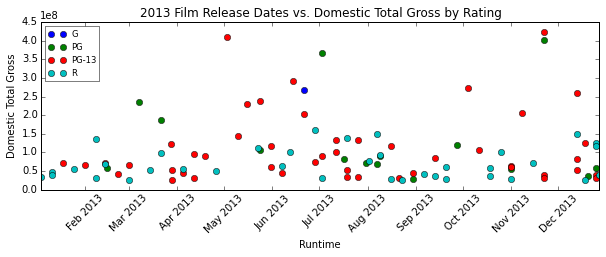

In [45]:
plt.figure(figsize=(10,3))
plt.title('2013 Film Release Dates vs. Domestic Total Gross by Rating')
plt.plot_date(dfg['ReleaseDate'],dfg['DomesticTotalGross'], label="G")
plt.plot_date(dfpg['ReleaseDate'],dfpg['DomesticTotalGross'], label="PG")
plt.plot_date(dfpg13['ReleaseDate'],dfpg13['DomesticTotalGross'], label="PG-13")
plt.plot_date(dfr['ReleaseDate'],dfr['DomesticTotalGross'], label="R")
plt.legend(loc='best', framealpha=0.5, prop={'size':'small'})
plt.xticks(rotation=45)
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')

question for later: how to fix legend so it only shows one bubble?

##### Challenge 5:
What director in your dataset has the highest gross per movie?



In [52]:
directors = df.groupby('Director').mean()

In [53]:
directors.head()

,Budget,DomesticTotalGross,Runtime
Director,,,
Adam McKay,50000000,125168368,119
Alan Taylor,170000000,206362140,120
Alfonso Cuaron,100000000,274092705,91
Andres Muschietti,15000000,71628180,100
Andrew Niccol,40000000,26627201,125


In [54]:
directors.sort_values(by="DomesticTotalGross")

AttributeError: 'DataFrame' object has no attribute 'sort_values'

In [55]:
pd.__version__

'0.16.2'

In [58]:
# df.sort_values is new in 0.17.0, must use df.sort for now
directors.sort(['DomesticTotalGross'], ascending=False).head()

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000,424668047,146
Shane Black,200000000,409013994,129
Chris BuckJennifer Lee,150000000,400738009,108
Pierre CoffinChris Renaud,76000000,368061265,98
Zack Snyder,225000000,291045518,143


Francis Lawrence has the highest average Domestic Total Gross per film. A further question would be spending time to fix the Director column so that multiple directors do not appear as a combined director.

##### Challenge 6
Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [82]:
df['Month'] = df['ReleaseDate'].apply(lambda x: x.month)

In [83]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03,5
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14,6


In [84]:
months = df.groupby("Month").mean()

In [85]:
months.head()

,Budget,DomesticTotalGross,Runtime
Month,,,
1,3.187500e+07,4.954324e+07,94.600000
2,4.600000e+07,6.738601e+07,103.857143
3,1.013750e+08,9.609710e+07,109.111111
4,3.883333e+07,6.094072e+07,114.166667
5,1.328750e+08,1.774097e+08,117.875000


In [86]:
from scipy.stats import sem

In [93]:
months['sem'] = [
    sem(df[df['Month'] == 1]['DomesticTotalGross']),
    sem(df[df['Month'] == 2]['DomesticTotalGross']),
    sem(df[df['Month'] == 3]['DomesticTotalGross']),
    sem(df[df['Month'] == 4]['DomesticTotalGross']),
    sem(df[df['Month'] == 5]['DomesticTotalGross']),
    sem(df[df['Month'] == 6]['DomesticTotalGross']),
    sem(df[df['Month'] == 7]['DomesticTotalGross']),
    sem(df[df['Month'] == 8]['DomesticTotalGross']),
    sem(df[df['Month'] == 9]['DomesticTotalGross']),
    sem(df[df['Month'] == 10]['DomesticTotalGross']),
    sem(df[df['Month'] == 11]['DomesticTotalGross']),
    sem(df[df['Month'] == 12]['DomesticTotalGross'])
    ]
    

In [94]:
months.head()

,Budget,DomesticTotalGross,Runtime,sem
Month,,,,
1,3.187500e+07,4.954324e+07,94.600000,6555914.034601
2,4.600000e+07,6.738601e+07,103.857143,12409272.366783
3,1.013750e+08,9.609710e+07,109.111111,24413138.904748
4,3.883333e+07,6.094072e+07,114.166667,10329105.790812
5,1.328750e+08,1.774097e+08,117.875000,39518588.373287


In [95]:
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [97]:
import numpy as np

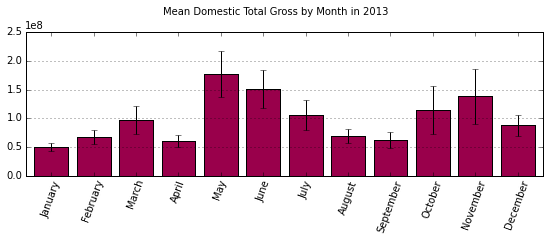

In [111]:
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.8; 
tickLocations = np.arange(12)
rectLocations = tickLocations-(width/2.0)
ax.bar(rectLocations, months['DomesticTotalGross'], width,
 color='#99004b', yerr=months['sem'], ecolor="#000000")

ax.set_xticks(ticks= tickLocations)
ax.set_xticklabels(labels)
ax.set_xlim(min(tickLocations)-0.6, 
 max(tickLocations)+0.6)
ax.yaxis.grid(True)

plt.xticks(rotation=70)

# --- title and save

fig.suptitle('Mean Domestic Total Gross by Month in 2013')
fig.tight_layout(pad=2)